# 1. Create a  white image and display it.

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
from util_func import show_img

import matplotlib.pyplot as plt 


# Weekly Activity


<function matplotlib.pyplot.show(close=None, block=None)>

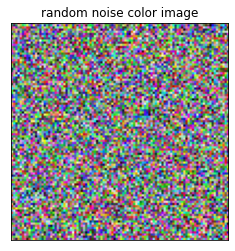

In [3]:
# Q1 random noise color image
noise_color_img = np.random.randint(0, high=256, size=(100, 100, 3), dtype=np.uint8)

plt.imshow(noise_color_img)
plt.title("random noise color image")
plt.xticks([]), plt.yticks([])
plt.show

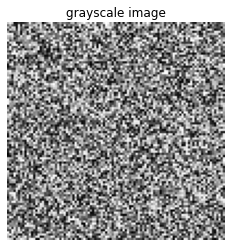

In [4]:
#Q1 a grayscale image
def random_grayscale():
    return np.random.randint(0, 256)

grayscale_image = np.zeros((100, 100), dtype = np.uint8)
for y in range(100):
    for x in range(100):
        grayscale_image[y, x] = random_grayscale()
        
plt.imshow(grayscale_image, cmap = 'gray')
plt.axis('off')
plt.title('grayscale image')
plt.show()

In [5]:
#Q2 Dividing image into smaller patches using cropping

img = cv.imread("images/dog.jfif")

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()

    h, w = img.shape[:2]
    n_vertical_grids = 3
    n_horizontal_grids = 3

    # row sizes and column sizes
    M = int(h / n_vertical_grids)
    N = int(w / n_horizontal_grids)

    tiles = []
    
    for y in range(0, h, M):
        for x in range(0, w, N):
            x1 = x + N
            y1 = y + M
        
            if x1 > w and y1> h:
                x1 = w - 1
                x2 = h - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:w]
                tiles.append(tile)
        
            elif y1 > h:
                y1 = h - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)
            
            elif x1 > w:
                x1 = w - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)
            
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)  
                
    show_img("crop", img_copy)
            
crop_grid(img, 3, 3, (255, 0, 0))

In [10]:
##Exercise Q3
def smooth_transition_images(img, img2, alpha):
    return cv.addWeighted(img, alpha, img2, 1 - alpha, 0)

img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

alpha = 0.6
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

# Define the number of steps and generate image sequences
num_steps = 20
alpha_values = np.linspace(0, 1, num_steps)

# Create and save the image sequences
for i, alpha in enumerate(alpha_values):
    blended_image = smooth_transition_images(img, img2, alpha)
    cv.imshow("Smooth Transition", blended_image)
    cv.waitKey(100)  # Adjust the time (in milliseconds) between each frame
    
cv.destroyAllWindows()

#Exercise 4

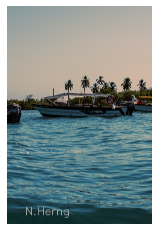

In [20]:
# Load the image
img_rgb = cv.imread("images/travel_hd.jpg")

# Create a copy of the image to avoid modifying the original
output_img = img_rgb.copy()

# Text to display
text = 'N.Herng'

# Define the font
font = cv.FONT_HERSHEY_SIMPLEX

# Text properties
font_scale = 10
thickness = 20
color = (163, 163, 163)

# Calculate the text size
(text_width, text_height), _ = cv.getTextSize(text, font, font_scale, thickness)

# Position of the text (bottom left corner)
x = img_rgb.shape[1] // 8
y = img_rgb.shape[0] - text_height - 30  # 30 pixels above the bottom

# Put the text on the image
cv.putText(output_img,
           text=text,
           org=(x, y),
           fontFace=font,
           fontScale=font_scale,
           color=color,
           thickness=thickness)

# Display the image with the text
plt.imshow(cv.cvtColor(output_img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
